## BBM467-SMALL DATA SCIENCE PROJECT

<b>Zafer Can Yücel</b>

<b>Gökay Berkem Turan</b>

## Table of Content

[Purpose](#purpose)   
[Data Understanding](#data_understanding)   
[Data Preparation](#data_preparation)
[Modeling for Classification](#classificationmodel)<br>
[Screenshots of Web Interface](#webScreenshot)

## Purpose <a class="anchor" id="purpose"></a>

The purpose of this project is to create a machine learning model using the dataset we have and to make a dynamic web interface using the model we have created.

**Importing necessary libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler 
import warnings
warnings.filterwarnings("ignore")

## Data Understanding <a class="anchor" id="data_understanding"></a>

In [2]:
originalData = pd.read_csv("sdsp_patients.csv") #path of the csv file
originalData.head()

,Disease,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_41,Feature_42,Feature_43,Feature_44,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49,Feature_50
0,Disease_1,Male,28.0,130,96.0,2.0,No,Yes,Yes,No,...,No,No,No,0,No,No,No,No,No,No
1,Disease_1,Male,18.0,95,46.0,3.0,Yes,No,No,No,...,No,Yes,No,0,No,No,No,No,No,No
2,Disease_1,Male,44.0,152,150.0,1.0,No,Yes,No,Yes,...,Yes,No,No,0,No,No,No,No,No,No
3,Disease_1,Male,19.0,112,66.0,18.0,No,No,No,Yes,...,No,Yes,No,0,No,No,No,No,No,No
4,Disease_1,Male,17.5,105.5,54.0,3.0,No,No,Yes,Yes,...,No,No,No,0,No,No,No,No,Yes,No


In [3]:
originalData.tail()

,Disease,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_41,Feature_42,Feature_43,Feature_44,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49,Feature_50
395,Disease_1,Female,36.0,142,144.0,24.0,No,No,No,Yes,...,Yes,No,No,8,Yes,No,No,No,No,No
396,Disease_1,Male,60.0,172,165.0,120.0,No,No,Yes,No,...,No,No,No,9,Yes,No,No,No,No,No
397,Disease_1,Female,41.0,147,156.0,60.0,No,Yes,No,No,...,No,No,No,9,Yes,Yes,Yes,No,No,No
398,Disease_1,Male,37.0,138,144.0,120.0,No,Yes,No,No,...,No,No,No,9,Yes,No,No,No,No,No
399,Disease_1,Male,30.0,130,108.0,6.0,Yes,No,No,No,...,No,Yes,No,9,Yes,No,Yes,No,No,No


In [4]:
originalData.shape

(400, 51)

In [5]:
originalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
Disease       400 non-null object
Feature_1     400 non-null object
Feature_2     400 non-null float64
Feature_3     400 non-null object
Feature_4     400 non-null float64
Feature_5     400 non-null float64
Feature_6     400 non-null object
Feature_7     400 non-null object
Feature_8     400 non-null object
Feature_9     400 non-null object
Feature_10    400 non-null object
Feature_11    400 non-null object
Feature_12    400 non-null object
Feature_13    400 non-null object
Feature_14    400 non-null object
Feature_15    400 non-null object
Feature_16    400 non-null object
Feature_17    400 non-null object
Feature_18    400 non-null object
Feature_19    400 non-null object
Feature_20    400 non-null object
Feature_21    400 non-null object
Feature_22    400 non-null object
Feature_23    400 non-null object
Feature_24    400 non-null object
Feature_25    400 non-null object
Feature_

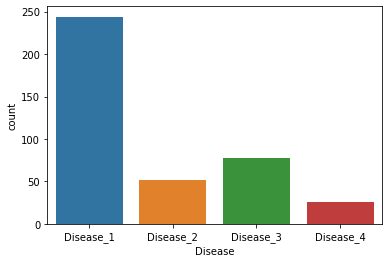

In [6]:
ax = sns.countplot(originalData['Disease'],label = 'Count')

## Data Preparation <a class="anchor" id="data_preparation"></a>

Since there are empty entries in the dataset, we replaced the empty entries with "nan".

In [7]:
originalData.replace(' ', np.nan, inplace=True)

In [8]:
originalData.isnull().sum()

Disease         0
Feature_1       0
Feature_2       0
Feature_3       2
Feature_4       0
Feature_5       0
Feature_6       0
Feature_7       0
Feature_8       0
Feature_9       0
Feature_10      0
Feature_11      0
Feature_12      0
Feature_13      0
Feature_14      0
Feature_15      0
Feature_16      0
Feature_17      0
Feature_18      0
Feature_19      0
Feature_20      0
Feature_21      0
Feature_22      0
Feature_23      0
Feature_24      0
Feature_25      0
Feature_26      0
Feature_27      0
Feature_28      1
Feature_29      0
Feature_30      0
Feature_31      0
Feature_32     16
Feature_33     12
Feature_34      0
Feature_35     43
Feature_36    259
Feature_37      0
Feature_38      0
Feature_39      0
Feature_40      0
Feature_41      0
Feature_42      0
Feature_43      0
Feature_44      0
Feature_45      0
Feature_46      0
Feature_47     20
Feature_48     20
Feature_49     20
Feature_50     24
dtype: int64

As you can see from the output above, some features have too many "nan" values. In this case, since deleting rows with "nan" values will cause more data loss,we decided to delete features with too many "nan" values. These features are 'Feature_32','Feature_33','Feature_35', 'Feature_36', 'Feature_47', 'Feature_48', 'Feature_49', 'Feature_50'.

In [9]:
features_to_delete = ['Feature_32','Feature_33','Feature_35', 'Feature_36', 'Feature_47', 'Feature_48', 'Feature_49', 'Feature_50']
originalData = originalData.drop(features_to_delete, axis =1)

In [10]:
for i in range(6,47):
    if i not in [28,29,32,33,35,36,44,47,48,49,50]:
        featureName = "Feature_"+str(i)
        print("---------------------------------")
        print("No/Yes Counts")
        print(originalData[featureName].value_counts())

---------------------------------
No/Yes Counts
No     258
Yes    142
Name: Feature_6, dtype: int64
---------------------------------
No/Yes Counts
No     226
Yes    174
Name: Feature_7, dtype: int64
---------------------------------
No/Yes Counts
No     340
Yes     60
Name: Feature_8, dtype: int64
---------------------------------
No/Yes Counts
No     342
Yes     58
Name: Feature_9, dtype: int64
---------------------------------
No/Yes Counts
No     380
Yes     20
Name: Feature_10, dtype: int64
---------------------------------
No/Yes Counts
No     397
Yes      3
Name: Feature_11, dtype: int64
---------------------------------
No/Yes Counts
No     399
Yes      1
Name: Feature_12, dtype: int64
---------------------------------
No/Yes Counts
No     380
Yes     20
Name: Feature_13, dtype: int64
---------------------------------
No/Yes Counts
No     395
Yes      5
Name: Feature_14, dtype: int64
---------------------------------
No/Yes Counts
No     393
Yes      7
Name: Feature_15, dtype: 

You can see the "yes / no" distribution of features with "yes / no" values from the output above. In the above output we decided to delete the columns that are all "yes" or all "no". These features are 'Feature_12','Feature_16','Feature_19','Feature_25'.

In [11]:
featuresToDrop = ["Feature_12","Feature_16","Feature_19","Feature_25"]
originalData = originalData.drop(featuresToDrop, axis =1)

As you can see from the outputs of the "Data Understanding" section, when we examined the dataset, we saw that Feature_3 is an object type when it should be float, has 2 "nan" values and Feature_28 has 1 "nan" value. 
We have replaced "nan" value in Feature_28 with most frequent value in Feature_28.
We have converted type of Feature_3 to type float64.We have replaced "nan" values in Feature_3 with mean value in Feature_3.

In [12]:
originalData['Feature_28'].fillna(originalData['Feature_28'].value_counts().index[0],inplace=True)

In [13]:
originalData["Feature_3"] = originalData["Feature_3"].astype("float64")
originalData["Feature_3"] = originalData["Feature_3"].fillna(originalData["Feature_3"].mean())

We have converted categorical features using label encoder.

In [14]:
originalData['Feature_1'].replace({'Male': 0, 'Female': 1},inplace=True)
originalData.replace({'No': 0, 'Yes': 1},inplace=True)

labelencoder = LabelEncoder()
originalData['Disease'] = labelencoder.fit_transform(originalData['Disease'].astype(str))
diseaseTypes = labelencoder.classes_

originalData['Feature_28'] = labelencoder.fit_transform(originalData['Feature_28'].astype(str))
classesOfFeature28 = labelencoder.classes_

In [15]:
print(diseaseTypes)
print(classesOfFeature28)

['Disease_1' 'Disease_2' 'Disease_3' 'Disease_4']
['1-2 Days a Month' '1-2 Days a Week' '3-4 Days a Week' 'Every Day']


For Feature_29,we have applied one hot encoder using get_dummies. After this step, since there are new 3 feature columns, we have dropped Feature_29 column itself.

In [16]:
originalData = pd.concat([originalData.drop('Feature_29', axis=1), pd.get_dummies(originalData['Feature_29'])], axis=1)

originalData.rename(columns = {'Evenings' : 'Feature_29_Evenings', 'Mornings' : 'Feature_29_Mornings', 'No Difference': 'Feature_29_NoDifference'}, inplace = True)

As you can see from the outputs below, there is no null values.

In [17]:
originalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 41 columns):
Disease                    400 non-null int32
Feature_1                  400 non-null int64
Feature_2                  400 non-null float64
Feature_3                  400 non-null float64
Feature_4                  400 non-null float64
Feature_5                  400 non-null float64
Feature_6                  400 non-null int64
Feature_7                  400 non-null int64
Feature_8                  400 non-null int64
Feature_9                  400 non-null int64
Feature_10                 400 non-null int64
Feature_11                 400 non-null int64
Feature_13                 400 non-null int64
Feature_14                 400 non-null int64
Feature_15                 400 non-null int64
Feature_17                 400 non-null int64
Feature_18                 400 non-null int64
Feature_20                 400 non-null int64
Feature_21                 400 non-null int64
Feature_22   

In [18]:
originalData.isnull().sum()

Disease                    0
Feature_1                  0
Feature_2                  0
Feature_3                  0
Feature_4                  0
Feature_5                  0
Feature_6                  0
Feature_7                  0
Feature_8                  0
Feature_9                  0
Feature_10                 0
Feature_11                 0
Feature_13                 0
Feature_14                 0
Feature_15                 0
Feature_17                 0
Feature_18                 0
Feature_20                 0
Feature_21                 0
Feature_22                 0
Feature_23                 0
Feature_24                 0
Feature_26                 0
Feature_27                 0
Feature_28                 0
Feature_30                 0
Feature_31                 0
Feature_34                 0
Feature_37                 0
Feature_38                 0
Feature_39                 0
Feature_40                 0
Feature_41                 0
Feature_42                 0
Feature_43    

You can see detailed statistical information about dataset from the output below.

In [19]:
originalData.describe(include = 'all')

,Disease,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_40,Feature_41,Feature_42,Feature_43,Feature_44,Feature_45,Feature_46,Feature_29_Evenings,Feature_29_Mornings,Feature_29_NoDifference
count,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000
mean,0.715000,0.50750,29.410125,127.770603,108.104000,23.038050,0.355000,0.435000,0.150000,0.145000,...,0.120000,0.397500,0.08750,0.29000,0.457500,0.085000,0.045000,0.49250,0.227500,0.280000
std,0.993096,0.50057,14.350309,22.472799,49.526425,24.742478,0.479113,0.496378,0.357519,0.352542,...,0.325369,0.489994,0.28292,0.45433,1.547314,0.279231,0.207564,0.50057,0.419743,0.449561
min,0.000000,0.00000,10.000000,76.000000,12.000000,0.060000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.00000,18.000000,110.000000,64.500000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,1.00000,25.525000,127.885302,108.000000,12.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,2.000000,1.00000,38.000000,147.000000,144.000000,36.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.00000,1.00000,0.000000,0.000000,0.000000,1.00000,0.000000,1.000000
max,3.000000,1.00000,90.000000,181.000000,213.000000,168.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.00000,9.000000,1.000000,1.000000,1.00000,1.000000,1.000000


For numeric features, we have plotted boxplot to detect outliers.

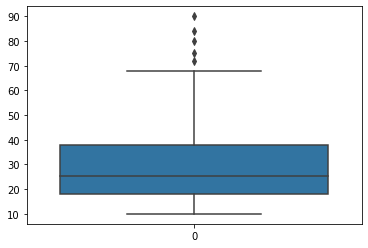

In [20]:
sns.boxplot(data=originalData["Feature_2"])

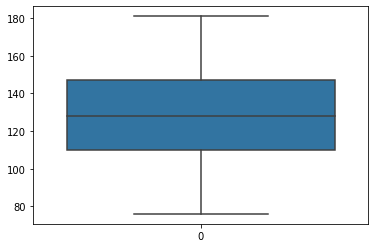

In [21]:
sns.boxplot(data=originalData["Feature_3"])

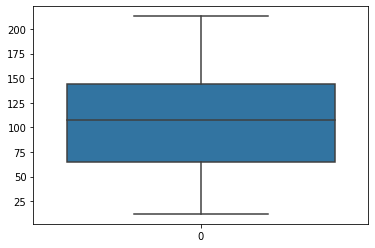

In [22]:
sns.boxplot(data=originalData["Feature_4"])

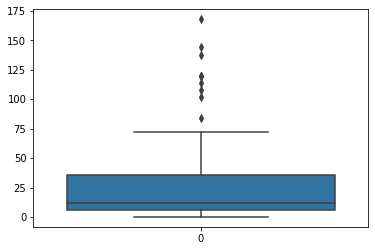

In [23]:
sns.boxplot(data=originalData["Feature_5"])

As can be seen from the above boxplots, we detected an outlier in Feature_2 and Feature_5.
<br>We have eliminated outliers by deleting outlier lines using the function below.

In [24]:
def removeOutliers(outlier_list):
    remove_list = []
    for i in outlier_list:
        Q1 = np.percentile(originalData[i], 25, interpolation = 'midpoint') 

        Q3 = np.percentile(originalData[i], 75,interpolation = 'midpoint') 
        IQR = Q3 - Q1 

        # Upper bound
        upper = np.where(originalData[i] >= (Q3+1.5*IQR))
        # Lower bound
        lower = np.where(originalData[i] <= (Q1-1.5*IQR))
        remove_list.extend(upper[0])
        remove_list.extend(lower[0])
        ''' Removing the Outliers '''
    remove_list = list(set(remove_list))
    originalData.drop(remove_list, inplace = True)


removeOutliers(['Feature_2', 'Feature_5'])

After eliminating outliers in numeric features, boxplots are as follows.

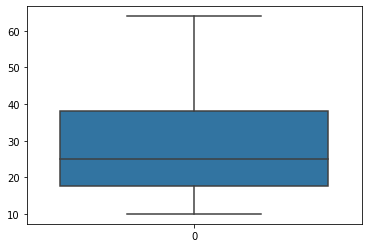

In [25]:
sns.boxplot(data=originalData["Feature_2"])

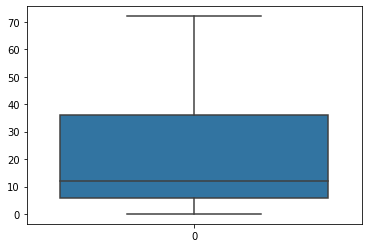

In [26]:
sns.boxplot(data=originalData["Feature_5"])

In [27]:
originalData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 0 to 399
Data columns (total 41 columns):
Disease                    387 non-null int32
Feature_1                  387 non-null int64
Feature_2                  387 non-null float64
Feature_3                  387 non-null float64
Feature_4                  387 non-null float64
Feature_5                  387 non-null float64
Feature_6                  387 non-null int64
Feature_7                  387 non-null int64
Feature_8                  387 non-null int64
Feature_9                  387 non-null int64
Feature_10                 387 non-null int64
Feature_11                 387 non-null int64
Feature_13                 387 non-null int64
Feature_14                 387 non-null int64
Feature_15                 387 non-null int64
Feature_17                 387 non-null int64
Feature_18                 387 non-null int64
Feature_20                 387 non-null int64
Feature_21                 387 non-null int64
Feature_22   

As you can see from the output above, 13 entries(rows) are eliminated.<br>
You can see new Disease distribution from below.

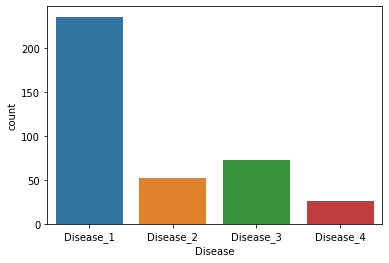

In [28]:
ax = sns.countplot(originalData['Disease'],label = 'Count')
ax.set_xticklabels(diseaseTypes, rotation='horizontal', fontsize=10)
plt.show()

In [29]:
originalDataX = originalData.iloc[:,1:] 
originalDataY = originalData.iloc[:,0]

You can see correlations between features from the correlation map below.

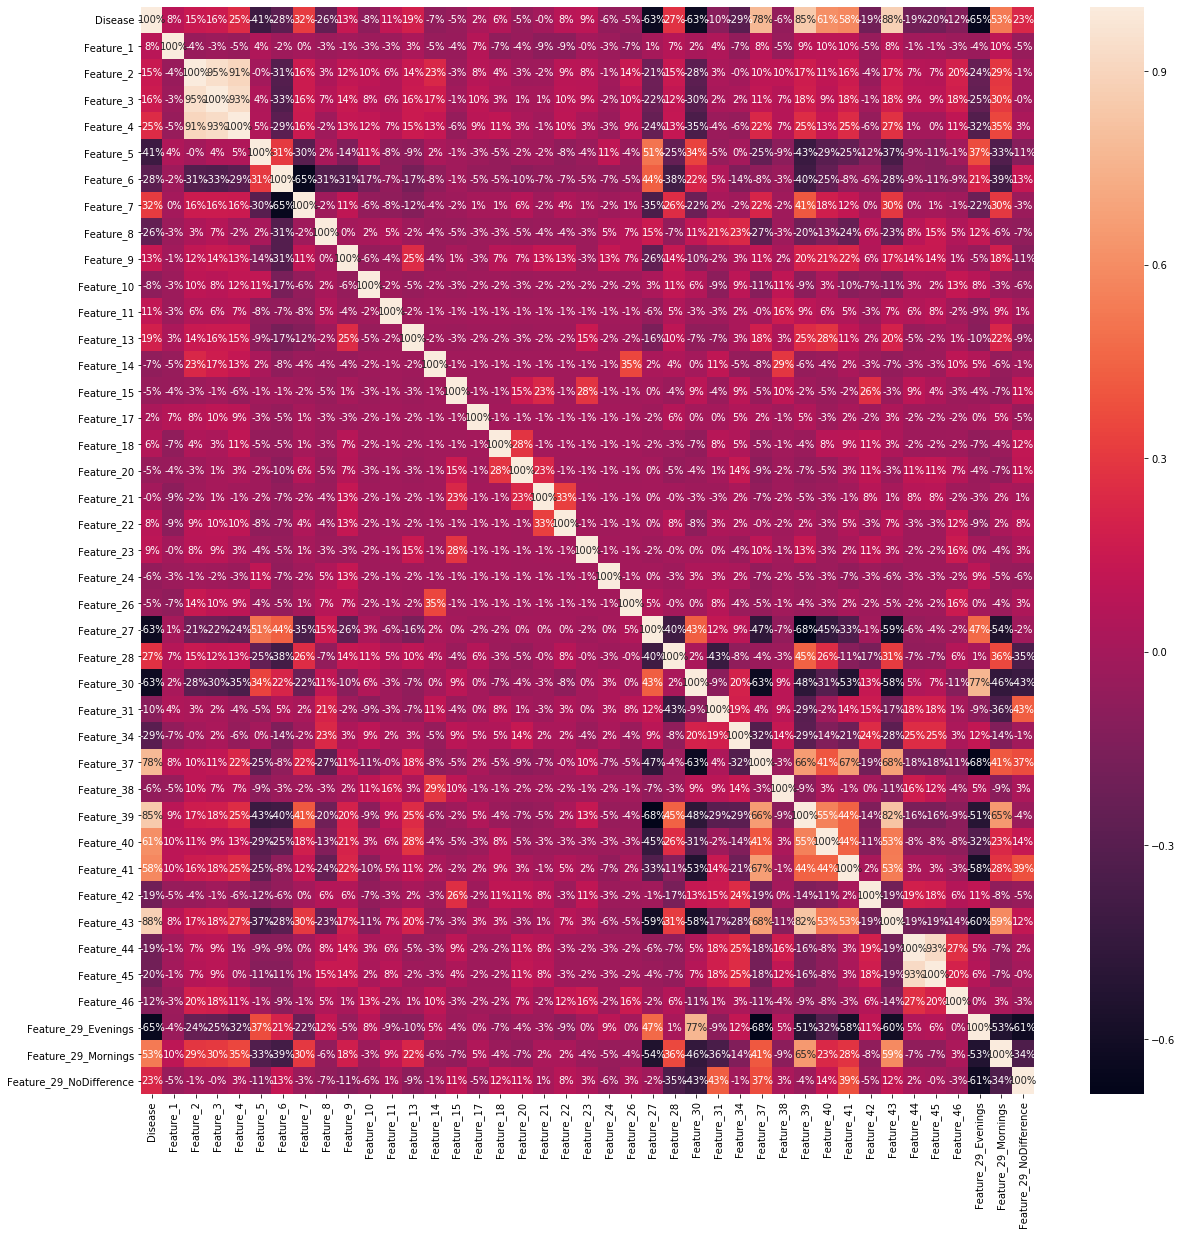

In [30]:
plt.figure(figsize=(20,20))
sns.heatmap(originalData.corr(), annot=True, fmt='.0%')
plt.show()

We choose best N features by using SelectKBest method.<br>
**We can change the web interface by changing value of "bestN" variable, with this variable we choose how many best features that we want to select.**

In [31]:
bestN = 5
bestNFeatures = SelectKBest(score_func=chi2, k=bestN)
fit = bestNFeatures.fit(originalDataX,originalDataY)
scores = pd.DataFrame(fit.scores_)
features = pd.DataFrame(originalDataX.columns)
featuresAndScores = pd.concat([features,scores],axis=1)
featuresAndScores.columns = ['Features','Scores']
featuresAndScores = featuresAndScores.nlargest(bestN,'Scores')

In [32]:
featuresAndScores

,Features,Scores
4,Feature_5,1460.921200
3,Feature_4,1234.631414
29,Feature_39,256.181243
33,Feature_43,222.398650
27,Feature_37,187.726231


In this part, we have made some arrangements.<br>
In order to make web interface dynamic in terms of selected features,we have written best N features to json file and we created numpy file to keep some necessary informations.

In [33]:
featureDictionary = {'Feature_1':'gender','Feature_2':'numeric','Feature_3':'numeric','Feature_4':'numeric'
                     ,'Feature_5':'numeric','Feature_44':'numeric','Feature_28':'multipleChoice','Feature_29':'categorical'}
nameTypeDict = {}
jsonList = []

In [34]:
feature29List = ['Feature_29_Mornings','Feature_29_Evenings','Feature_29_NoDifference']

In [35]:
featuresAndScores = list(featuresAndScores['Features'])

if(any([True for i in feature29List if i in featuresAndScores])):
    featuresAndScores.extend(feature29List)
featuresAndScores = list(set(featuresAndScores))
jsonFeatureList = featuresAndScores.copy()

In [36]:
if(any([True for bestFeatures in feature29List if bestFeatures in jsonFeatureList])):
        jsonFeatureList = [feat for feat in jsonFeatureList if feat not in feature29List]
        jsonFeatureList.append('Feature_29')

In [37]:
for bestFeatures in jsonFeatureList:
    if bestFeatures in featureDictionary:
        nameTypeDict["name"] = bestFeatures
        nameTypeDict["id"] = featureDictionary[bestFeatures]
    else:
        nameTypeDict["name"] = bestFeatures
        nameTypeDict["id"] = "yes_no"
    jsonDict = nameTypeDict
    nameTypeDict = {}
    jsonList.append(jsonDict)

In [38]:
#static path
with open("predict_disease\\static\\features.json", "w") as outfile: 
    json.dump(jsonList, outfile)

In [39]:
editedOriginalData = originalData[featuresAndScores].copy()

In [40]:
prediction_order = np.array(list(editedOriginalData.columns))

In [41]:
np.save("pred_order.npy",prediction_order)

In [42]:
original_dataset_accuracy = []
normalized_dataset_accuracy = []

## Modeling for Classification <a class="anchor" id="classificationmodel"></a>

We split the original data into 80% train and 20% test. We tried to keep class distribution equal by using stratify parameter.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(editedOriginalData, originalDataY, test_size=0.2, random_state=42,stratify=originalDataY) 

We have created models with SVM,Random Forest,Decision Tree,KNN and Naïve Bayes classification algorithms.

<h3>SVM Classification with Original Data</h3>

In [44]:
svm = SVC(random_state=1)
svm.fit(X_train,y_train)
print("Original dataset with SVM model\n")
print(classification_report(y_test, svm.predict(X_test)))
acc = accuracy_score(y_test, svm.predict(X_test))
original_dataset_accuracy.append(acc)

Original dataset with SVM model

              precision    recall  f1-score   support

           0       0.74      0.88      0.80        48
           1       0.50      0.20      0.29        10
           2       0.64      0.60      0.62        15
           3       0.33      0.20      0.25         5

    accuracy                           0.69        78
   macro avg       0.55      0.47      0.49        78
weighted avg       0.66      0.69      0.66        78



<h3>Random Forest Classification with Original Data</h3>

In [45]:
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train,y_train)
print("Original dataset with Random Forest model\n")
print(classification_report(y_test, rf.predict(X_test)))
acc = accuracy_score(y_test, rf.predict(X_test))
original_dataset_accuracy.append(acc)

Original dataset with Random Forest model

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       1.00      0.70      0.82        10
           2       0.94      1.00      0.97        15
           3       1.00      1.00      1.00         5

    accuracy                           0.96        78
   macro avg       0.97      0.93      0.94        78
weighted avg       0.96      0.96      0.96        78



<h3>Decision Tree Classification with Original Data</h3>

In [46]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print("Original dataset with Decision Tree\n")
print(classification_report(y_test, dt.predict(X_test)))
acc = accuracy_score(y_test, dt.predict(X_test))
original_dataset_accuracy.append(acc)

Original dataset with Decision Tree

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       1.00      0.60      0.75        10
           2       0.88      1.00      0.94        15
           3       1.00      1.00      1.00         5

    accuracy                           0.95        78
   macro avg       0.96      0.90      0.92        78
weighted avg       0.95      0.95      0.94        78



<h3>KNN Classification with Original Data</h3>

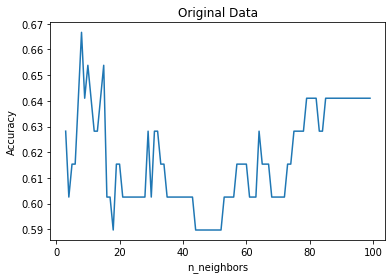

In [47]:
score_original =[]
for i in range (3,100):
    knn= KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    score_original.append(knn.score(X_test, y_test))

plt.plot(range(3,100),score_original)
plt.title("Original Data")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.show()
best_knn =score_original.index(max(score_original))+3

In [48]:
knn= KNeighborsClassifier(n_neighbors = best_knn)
knn.fit(X_train,y_train)
print("Original dataset with Knn model\n")
print(classification_report(y_test, knn.predict(X_test)))
acc = accuracy_score(y_test, knn.predict(X_test))
original_dataset_accuracy.append(acc)

Original dataset with Knn model

              precision    recall  f1-score   support

           0       0.74      0.77      0.76        48
           1       0.67      0.20      0.31        10
           2       0.55      0.80      0.65        15
           3       0.33      0.20      0.25         5

    accuracy                           0.67        78
   macro avg       0.57      0.49      0.49        78
weighted avg       0.67      0.67      0.64        78



<h3>Naïve Bayes Classification with Original Data</h3>

In [49]:
nb = GaussianNB()
nb.fit(X_train,y_train)
print("Original dataset with Naïve Bayes\n")
print(classification_report(y_test, nb.predict(X_test)))
acc = accuracy_score(y_test, nb.predict(X_test))
original_dataset_accuracy.append(acc)

Original dataset with Naïve Bayes

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.90      0.95        10
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00         5

    accuracy                           0.99        78
   macro avg       0.99      0.97      0.98        78
weighted avg       0.99      0.99      0.99        78



<h4>Data Normalization</h4>

We split the original data into 80% train and 20% test. We tried to keep class distribution equal by using stratify parameter.

In [50]:
X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = train_test_split(editedOriginalData, originalDataY, test_size=0.2, random_state=42,stratify=originalDataY)

We applied min-max normalization by using MinMaxScaler.

In [51]:
scaler = MinMaxScaler()
X_train_normalized = pd.DataFrame(scaler.fit_transform(X_train_normalized), columns=X_train_normalized.columns)
X_test_normalized = pd.DataFrame(scaler.transform(X_test_normalized), columns=X_test_normalized.columns)

We have created models with SVM,Random Forest,Decision Tree,KNN and Naïve Bayes classification algorithms using normalized data.

<h3>SVM Classification with Normalized Data</h3>

In [52]:
svmNormalized = SVC(random_state=1)
svmNormalized.fit(X_train_normalized,y_train_normalized)
print("Normalized dataset with SVM model\n")
print(classification_report(y_test_normalized, svmNormalized.predict(X_test_normalized)))
accNormalized = accuracy_score(y_test_normalized, svmNormalized.predict(X_test_normalized))
normalized_dataset_accuracy.append(accNormalized)

Normalized dataset with SVM model

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       1.00      0.90      0.95        10
           2       0.74      0.93      0.82        15
           3       0.00      0.00      0.00         5

    accuracy                           0.91        78
   macro avg       0.67      0.71      0.69        78
weighted avg       0.86      0.91      0.88        78



<h3>Random Forest Classification with Normalized Data</h3>

In [53]:
rfNormalized = RandomForestClassifier(n_estimators=100, random_state=1)
rfNormalized.fit(X_train_normalized,y_train_normalized)
print("Normalized dataset with Random Forest model\n")
print(classification_report(y_test_normalized, rfNormalized.predict(X_test_normalized)))
accNormalized = accuracy_score(y_test_normalized, rfNormalized.predict(X_test_normalized))
normalized_dataset_accuracy.append(accNormalized)

Normalized dataset with Random Forest model

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       1.00      0.70      0.82        10
           2       0.94      1.00      0.97        15
           3       1.00      1.00      1.00         5

    accuracy                           0.96        78
   macro avg       0.97      0.93      0.94        78
weighted avg       0.96      0.96      0.96        78



<h3>Decision Tree Classification with Normalized Data</h3>

In [54]:
dtNormalized = DecisionTreeClassifier()
dtNormalized.fit(X_train_normalized,y_train_normalized)
print("Normalized dataset with Decision Tree\n")
print(classification_report(y_test_normalized, dtNormalized.predict(X_test_normalized)))
accNormalized = accuracy_score(y_test_normalized, dtNormalized.predict(X_test_normalized))
normalized_dataset_accuracy.append(accNormalized)

Normalized dataset with Decision Tree

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       1.00      0.60      0.75        10
           2       0.88      1.00      0.94        15
           3       1.00      1.00      1.00         5

    accuracy                           0.95        78
   macro avg       0.96      0.90      0.92        78
weighted avg       0.95      0.95      0.94        78



<h3>KNN Classification with Normalized Data</h3>

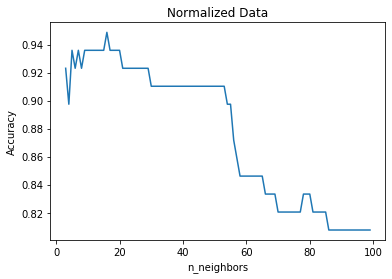

In [55]:
score_normalized =[]
for i in range (3,100):
    knn_normalized= KNeighborsClassifier(n_neighbors = i)
    knn_normalized.fit(X_train_normalized,y_train_normalized)
    score_normalized.append(knn_normalized.score(X_test_normalized, y_test_normalized))

plt.plot(range(3,100),score_normalized)
plt.title("Normalized Data")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")

plt.show()
best_knn_normalized =score_normalized.index(max(score_normalized))+3

In [56]:
knn_normalized= KNeighborsClassifier(n_neighbors = best_knn_normalized)
knn_normalized.fit(X_train_normalized,y_train_normalized)
print("Normalized dataset with Knn model\n")
print(classification_report(y_test_normalized, knn_normalized.predict(X_test_normalized)))
accNormalized = accuracy_score(y_test_normalized, knn_normalized.predict(X_test_normalized))
normalized_dataset_accuracy.append(accNormalized)

Normalized dataset with Knn model

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.90      0.95        10
           2       0.88      0.93      0.90        15
           3       0.75      0.60      0.67         5

    accuracy                           0.95        78
   macro avg       0.90      0.86      0.88        78
weighted avg       0.95      0.95      0.95        78



<h3>Naïve Bayes Classification with Normalized Data</h3>

In [57]:
nbNormalized = GaussianNB()
nbNormalized.fit(X_train_normalized,y_train_normalized)
print("Normalized dataset with Naïve Bayes\n")
print(classification_report(y_test_normalized, nbNormalized.predict(X_test_normalized)))
accNormalized = accuracy_score(y_test_normalized, nbNormalized.predict(X_test_normalized))
normalized_dataset_accuracy.append(accNormalized)

Normalized dataset with Naïve Bayes

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.90      0.95        10
           2       1.00      0.93      0.97        15
           3       0.83      1.00      0.91         5

    accuracy                           0.97        78
   macro avg       0.95      0.96      0.95        78
weighted avg       0.98      0.97      0.97        78



<h3>Comparison of Classification Models</h3>

You can see accuracies of different classification algorithms from the graph below.

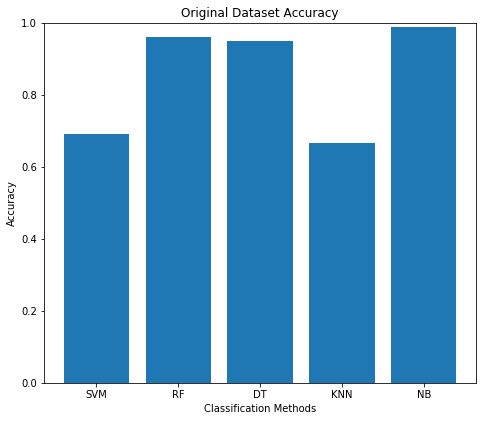

In [58]:
fig = plt.figure(figsize= (6,5))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Original Dataset Accuracy')

classification_methods = ['SVM', 'RF', 'DT','KNN','NB']
ax.bar(classification_methods, original_dataset_accuracy)
ax.set(ylim=[0, 1])
ax.set_xlabel("Classification Methods")
ax.set_ylabel("Accuracy")
plt.show()

In [59]:
print("Original Dataset Accuracies")
for j in range(len(original_dataset_accuracy)):
    print('{}: {:.3f}%'.format(classification_methods[j],original_dataset_accuracy[j]*100 ))

Original Dataset Accuracies
SVM: 69.231%
RF: 96.154%
DT: 94.872%
KNN: 66.667%
NB: 98.718%


You can see accuracies of different classification algorithms using normalized data from the graph below.

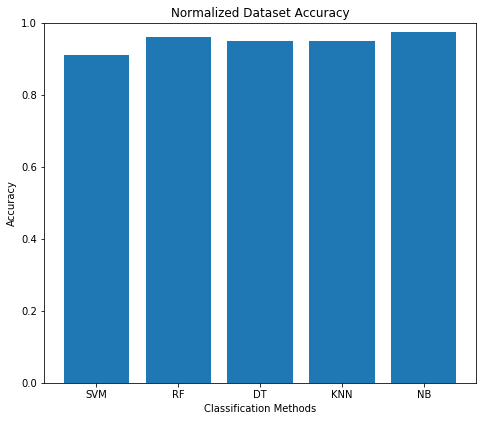

In [60]:
fig = plt.figure(figsize= (6,5))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Normalized Dataset Accuracy')

classification_methods = ['SVM', 'RF', 'DT','KNN','NB']
ax.bar(classification_methods, normalized_dataset_accuracy)
ax.set(ylim=[0, 1])
ax.set_xlabel("Classification Methods")
ax.set_ylabel("Accuracy")
plt.show()

In [61]:
print("Normalized Dataset Accuracies")
for j in range(len(normalized_dataset_accuracy)):
    print('{}: {:.3f}%'.format(classification_methods[j],normalized_dataset_accuracy[j]*100 ))

Normalized Dataset Accuracies
SVM: 91.026%
RF: 96.154%
DT: 94.872%
KNN: 94.872%
NB: 97.436%


We decided to use model trained with Random Forest algorithm. We exported this model to use in web interface.

In [62]:
pd.to_pickle(rf,"ml_model.pickle")


## Screenshots of Web Interface <a class="anchor" id="webScreenshot"></a>

<h4>Screenshots of 5 Features Selected Web Interface</h4>

![title](five_features_1.png)

![title](five_features_2.png)

<h4>Screenshots of 10 Features Selected Web Interface</h4>

![title](ten_features_1.png)

![title](ten_features_2.png)